In [1]:
import pandas as pd
from LR_model import LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import numpy as np

# <10 features

In [2]:
# https://archive.ics.uci.edu/dataset/20/census+income
def get_data_adult():
    df = pd.read_csv('data/adult.data', header=None)
    X = df.iloc[:, [0, 2, 4, 10, 11, 12]]
    y = [1 if x == ' <=50K' else 0 for x in df.iloc[:, 14]]
    return X, y

In [3]:
# https://archive.ics.uci.edu/dataset/850/raisin
def get_data_raisin():
    df = pd.read_csv('data/Raisin_Dataset.arff', skiprows=18, header=None)
    X = df.iloc[:, :7]
    y = [1 if x=='Kecimen' else 0 for x in df.iloc[:, 7]]
    return X, y

In [4]:
# https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik
def get_data_rice():
    df = pd.read_csv('data/Rice_Cammeo_Osmancik.arff', skiprows=16, header=None)
    X = df.iloc[:, :7]
    y = [1 if x=='Cammeo' else 0 for x in df.iloc[:, 7]]
    return X, y

## 10+ features

In [5]:
# https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
def get_data_bean():
    df = pd.read_csv('data/Dry_Bean_Dataset.arff', skiprows=25, header=None)
    df.loc[df[16].isin(['SEKER', 'DERMASON']), 16]
    X = df.loc[df[16].isin(['SEKER', 'DERMASON']), 0:15]
    y = [1 if x == 'SEKER' else 0 for x in df.loc[df[16].isin(['SEKER', 'DERMASON']), 16]]
    return X, y

In [6]:
# https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
def get_data_cancer():
    df = pd.read_csv('data/wdbc.data', header=None)
    X = df.iloc[:, 2:]
    y = df.iloc[:, 1]
    y = [1 if x == 'M' else 0 for x in y]
    return X, y

In [7]:
# https://archive.ics.uci.edu/dataset/94/spambase
def get_data_spam():
    df = pd.read_csv('data/spambase.data', header=None)
    X = df.iloc[:, :57]
    y = df.iloc[:, 57]
    return X, y

In [8]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=1471
def get_data_eeg():
    df = pd.read_csv('data/phplE7q6h.arff', skiprows=37, header=None)
    X = df.iloc[:, :14]
    y = df.iloc[:, 14]
    return X, y

In [9]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=1053
def get_data_jm1():
    df = pd.read_csv('data/jm1.arff', skiprows=356, header=None)
    X = df.iloc[:, :21]
    y = df.iloc[:, 21]
    y = [1 if x else 0 for x in y]
    return X, y

In [10]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=1053
def get_data_churn():
    df = pd.read_csv('data/churn.arff', skiprows=28, header=None)
    X = df.iloc[:, [0, 1, 3] + [i for i in range(6, 19)]]
    y = df.iloc[:, 20]
    return X, y

## 3.2

In [11]:
datasets = {
    'adult': get_data_adult(),
    'raisin': get_data_raisin(),
    'rice': get_data_rice(),
    'bean': get_data_bean(),
    'cancer': get_data_cancer(),
    'spam': get_data_spam(),
    'eeg': get_data_eeg(),
    #'jm1': get_data_jm1(), has some issues with data
    'churn': get_data_churn()
}
#adult, eeg, churn trudne zbiory

In [12]:
results = {
    'SGD': {},
    'IWLS': {},
    'ADAM': {}
}
n_splits = 5


for dataset in datasets:
    for r in np.random.randint(1, 10000, n_splits):
        X_train, X_test, y_train, y_test = train_test_split(datasets[dataset][0], datasets[dataset][1], test_size=0.2, random_state=r)
        for opt_algorithm in ['SGD', 'IWLS', 'ADAM']:
            model = LR(n_iterations=100, learning_rate=0.005, tol = 100)
            model.fit(X_train, y_train, optimization_algorithm=opt_algorithm, batch_size=64)
            if results[opt_algorithm].get(dataset) is None:
                results[opt_algorithm][dataset] = 0
            results[opt_algorithm][dataset] += balanced_accuracy_score(y_test, model.predict(X_test)) / n_splits

c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


ADAM stopping at iteration 6
SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6
SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6
SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6
SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6
SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6
SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


ADAM stopping at iteration 6
SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

ADAM stopping at iteration 6
SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6
SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6
SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6
SGD stopping at iteration 5
IWLS stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

ADAM stopping at iteration 6
SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5
ADAM stopping at iteration 6
SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5
ADAM stopping at iteration 6
SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


ADAM stopping at iteration 6
SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5
ADAM stopping at iteration 6
SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5
ADAM stopping at iteration 6
SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


SGD stopping at iteration 5
IWLS stopping at iteration 5
ADAM stopping at iteration 6


<Figure size 1152x864 with 0 Axes>

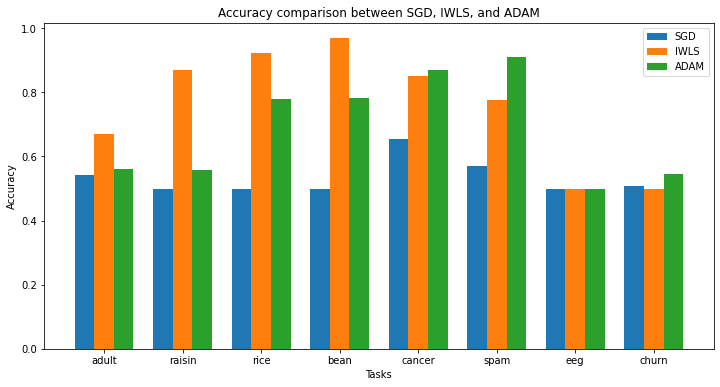

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize = (16, 12))

labels = list(results['SGD'].keys())
SGD_values = list(results['SGD'].values())
IWLS_values = list(results['IWLS'].values())
ADAM_values = list(results['ADAM'].values())

x = range(len(labels))

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.25

plt.bar(x, SGD_values, width=bar_width, label='SGD')
plt.bar([i + bar_width for i in x], IWLS_values, width=bar_width, label='IWLS')
plt.bar([i + bar_width*2 for i in x], ADAM_values, width=bar_width, label='ADAM')

plt.xlabel('Tasks')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison between SGD, IWLS, and ADAM')
plt.xticks([i + bar_width for i in x], labels)
plt.legend()
plt.show()

## 3.3

In [14]:
results = {
    'SGD': {},
    'IWLS': {},
    'ADAM': {}
}


for dataset in datasets:
    for opt_algorithm in ['SGD', 'IWLS', 'ADAM']:
        model = LR(n_iterations=500, learning_rate=0.005)
        X_train, X_test, y_train, y_test = train_test_split(datasets[dataset][0], datasets[dataset][1], test_size=0.2, random_state=42)
        loglikelihood = model.fit(X_train, y_train, optimization_algorithm=opt_algorithm, batch_size=64, loglikelihood=True)
        results[opt_algorithm][dataset] = loglikelihood

c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

SGD stopping at iteration 194
IWLS stopping at iteration 16


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

SGD stopping at iteration 18
IWLS stopping at iteration 6
ADAM stopping at iteration 63


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

SGD stopping at iteration 45
IWLS stopping at iteration 6
ADAM stopping at iteration 163


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

SGD stopping at iteration 7
IWLS stopping at iteration 82


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

IWLS stopping at iteration 68
ADAM stopping at iteration 20


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

IWLS stopping at iteration 197
ADAM stopping at iteration 276
SGD stopping at iteration 5


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

IWLS stopping at iteration 9
ADAM stopping at iteration 6


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:6: RuntimeWarning: overflow encount

IWLS stopping at iteration 6
ADAM stopping at iteration 56


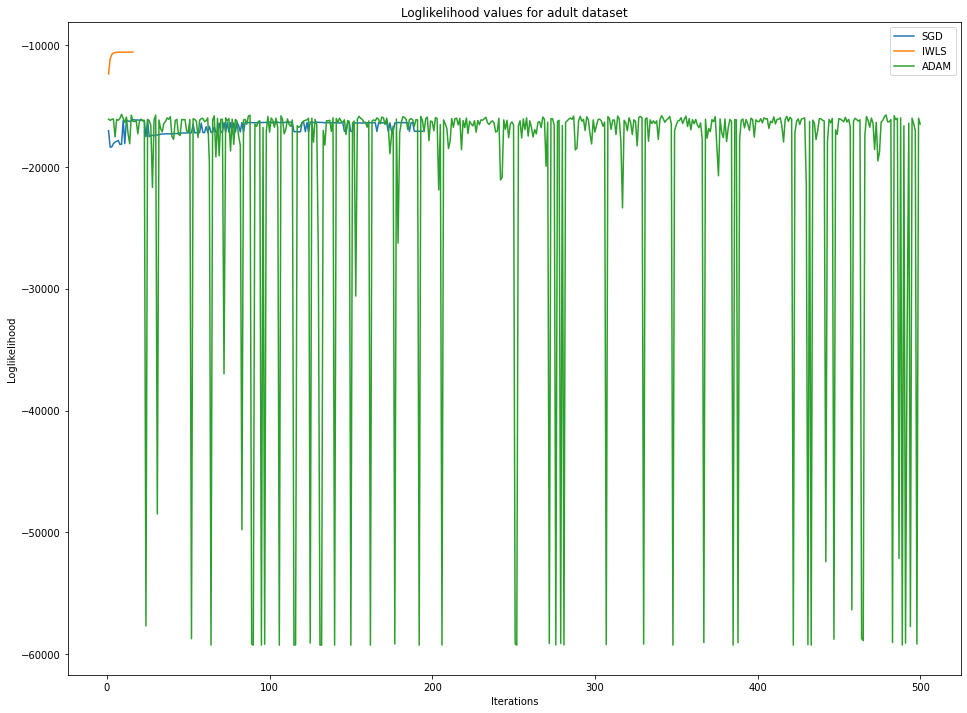

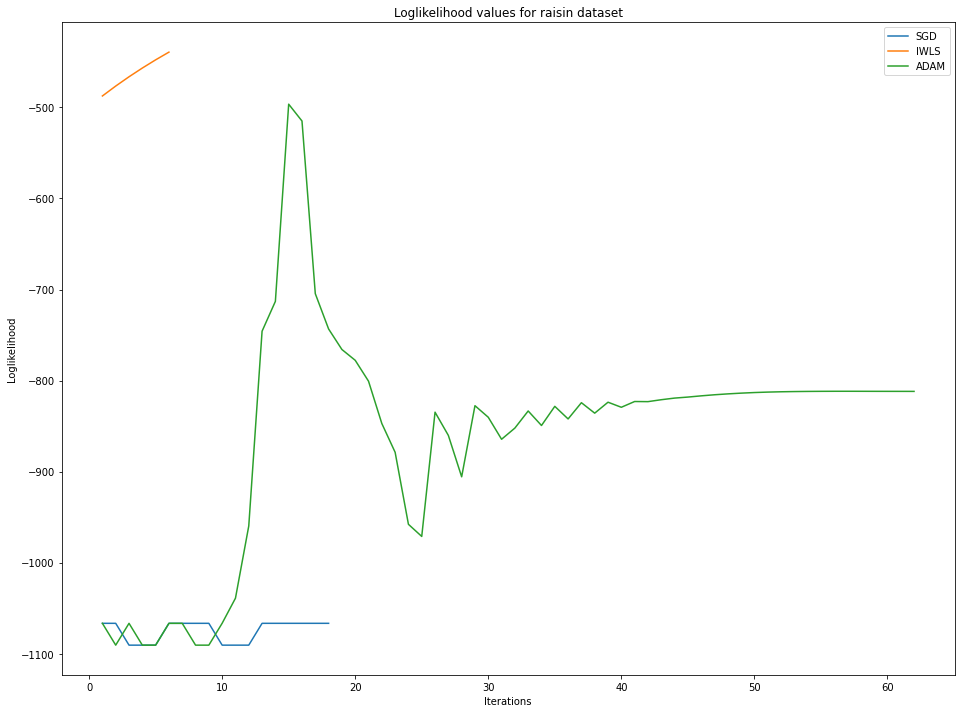

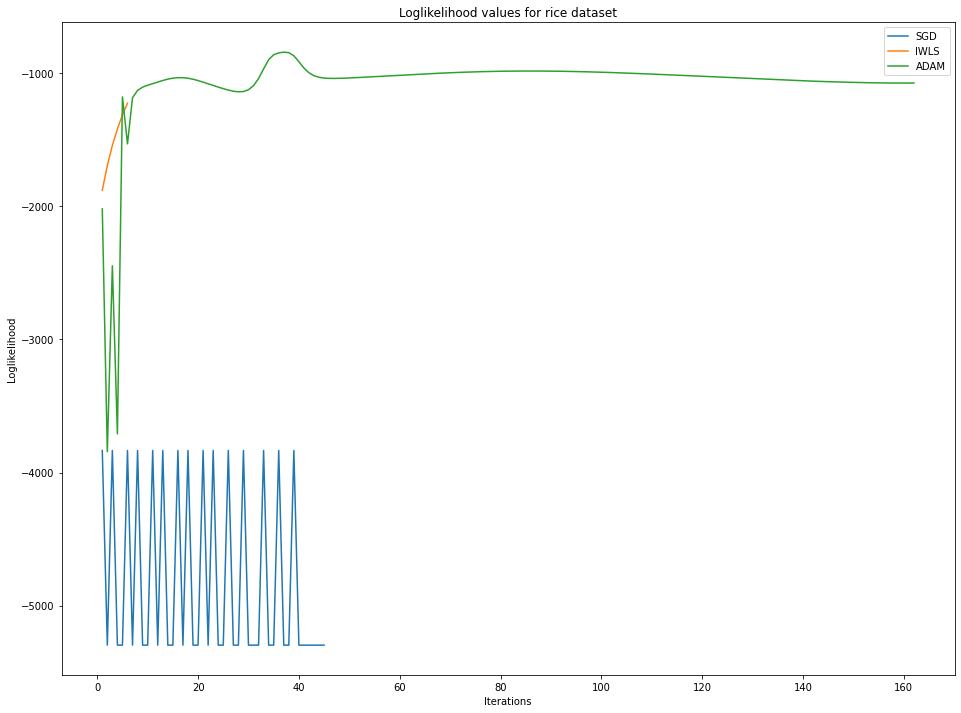

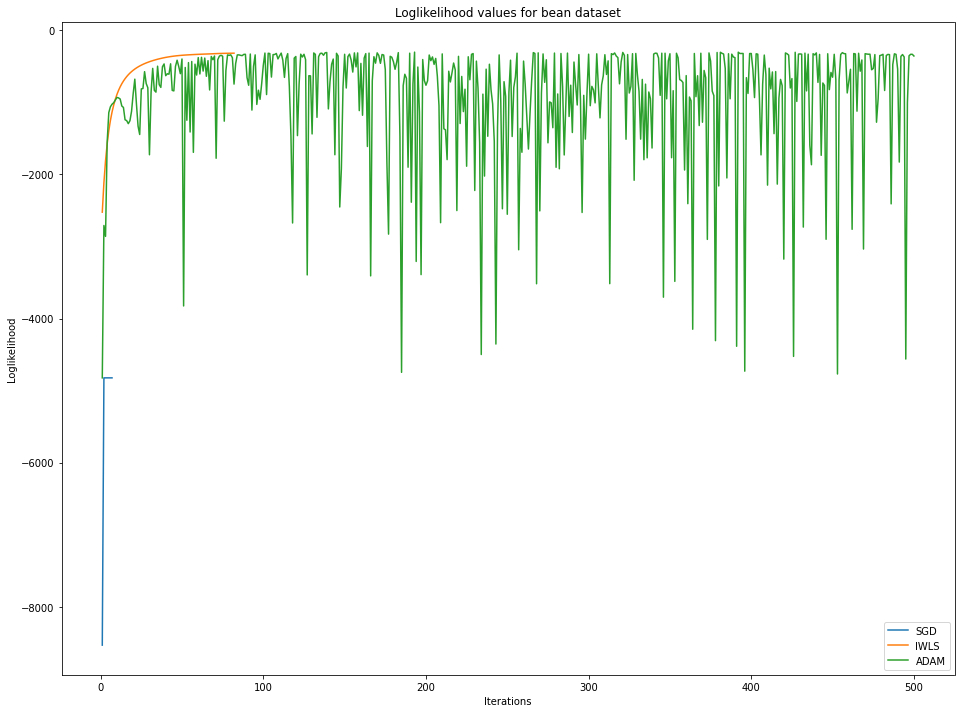

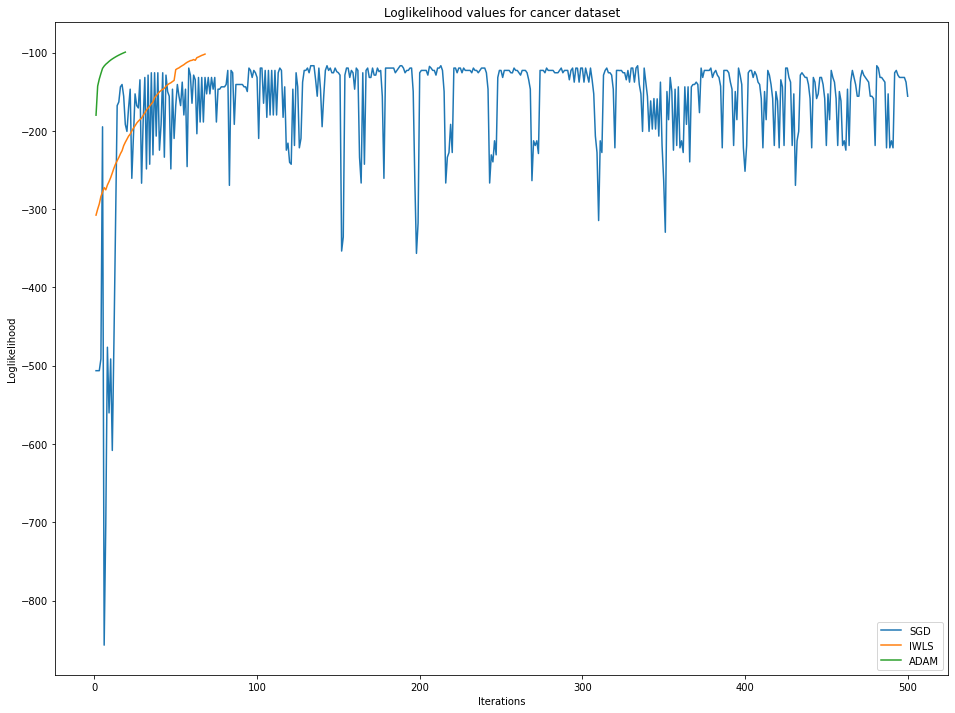

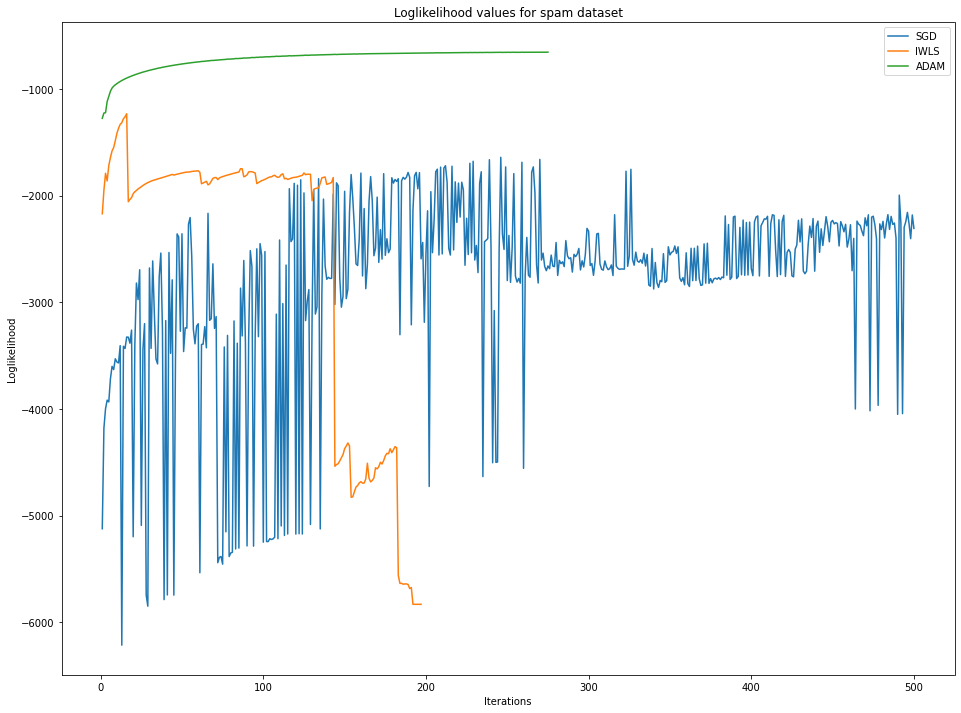

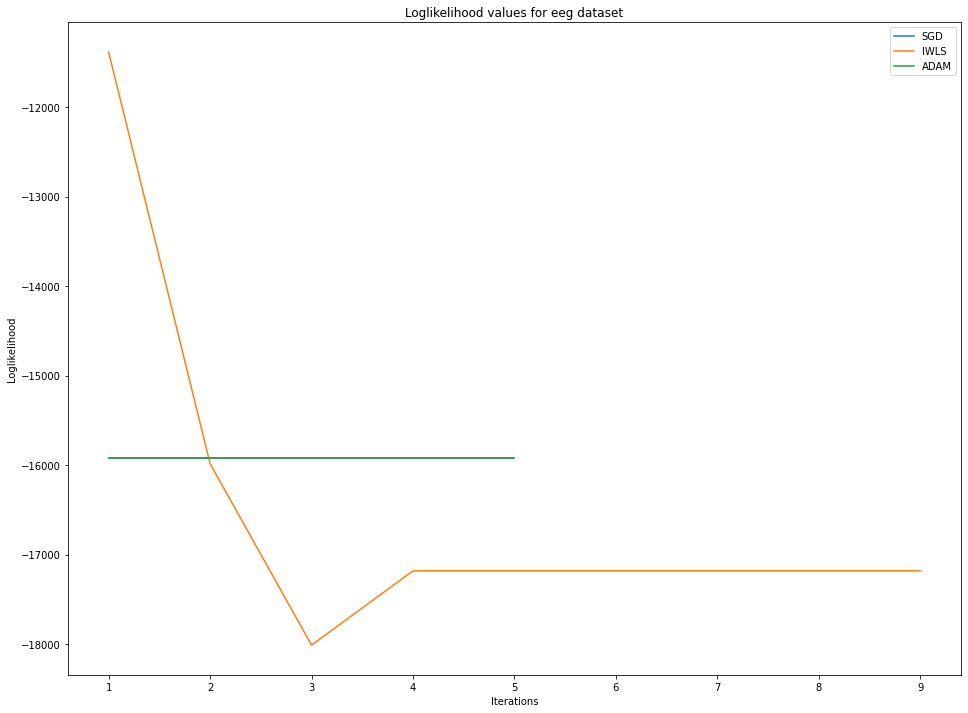

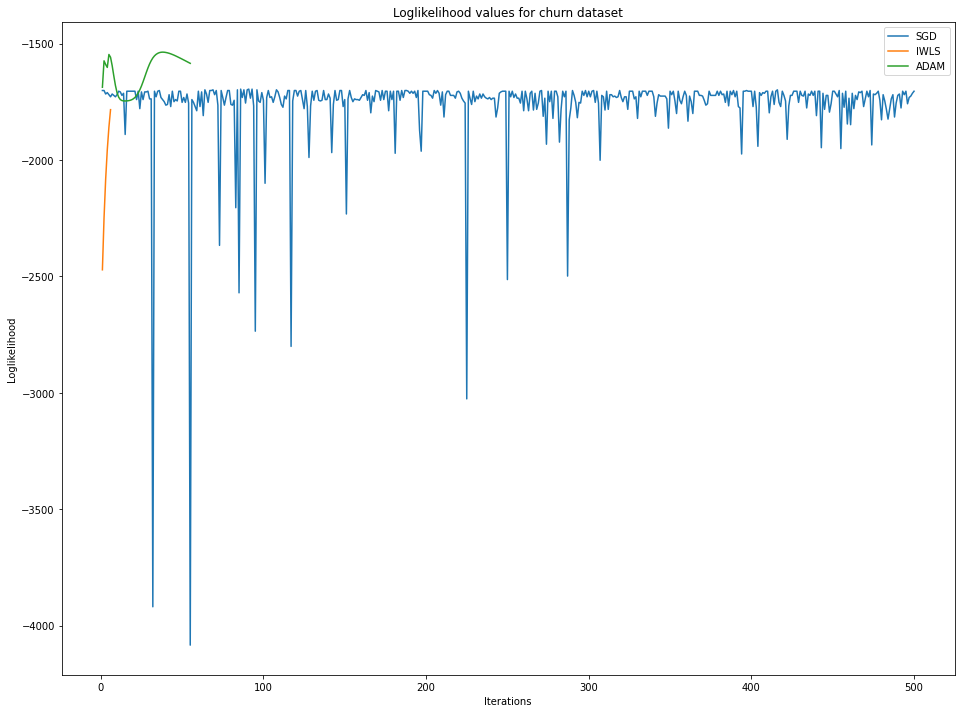

In [16]:
for dataset in datasets:

    
    plt.figure(figsize=(16, 12))
    
    for opt_algorithm in results.keys():
        loglikelihood_values = results[opt_algorithm][dataset]
        iterations = range(1, len(loglikelihood_values) + 1)
        
        plt.plot(iterations, loglikelihood_values, label=opt_algorithm)

    plt.title(f'Loglikelihood values for {dataset} dataset')
    plt.xlabel('Iterations')
    plt.ylabel('Loglikelihood')
    plt.legend()
    plt.show()
